# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
#import os
#os.chdir('/Users/smarcos/Downloads/click_prediction/')


In [3]:
# Read csv file 

df = pd.read_csv('ad_data.csv')

In [4]:
df.head(5)

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10103 entries, 0 to 10102
Data columns (total 7 columns):
click_status       10103 non-null int64
AMP_timestamp      10103 non-null object
Query Term         10103 non-null object
IP Address         10103 non-null object
User Agent         10103 non-null object
Cost Per Click     10103 non-null object
Conversions        10103 non-null int64
dtypes: int64(2), object(5)
memory usage: 552.6+ KB


2). Data Cleaning: 
Check missing values and column names
Clean click_status
Clean AMP_timestamp
Clean query_terms
Clean user_agent
Clean cost_per_click

In [6]:
# Check missing values 
df[df.isnull().any(axis=1)]

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions


In [7]:
#check column names
df.columns

Index(['click_status', 'AMP_timestamp', 'Query Term ', 'IP Address',
       'User Agent', 'Cost Per Click ', 'Conversions'],
      dtype='object')

In [8]:
# rename columns
df.columns = ['click_status','AMP_timestamp','query_term','IP_address','user_agent','cost_per_click','conversions']


In [9]:
df.head(5)

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0


In [10]:
# Replacing a bad format query.

df = df.replace('["stream tv shows","tv shows for free","watch free tv shows","watch online tv shows"', '["stream tv shows","tv shows for free","watch free tv shows","watch online tv shows"]')

In [11]:
import ast

# taking only the data which has click status =1

data_status1=df[df['click_status']==1]
query_terms=[]

# breaking the query terms into individual terms and appending the cost per click 
for i,j in enumerate(df['query_term']):
    for k in ast.literal_eval(j):
        query_terms.append((k,df.loc[i,'cost_per_click']))

In [12]:
# making a dataframe with the query terms

query_terms=pd.DataFrame(query_terms)
query_terms.columns=['terms','amount']

In [13]:
# replacing dollar sign from amount column

query_terms.amount = query_terms.amount.map(lambda x: float(x.strip('$ ')))
query_terms.head()

,terms,amount
0,michael kors,0.28
1,michael michael kors,0.28
2,meet girls,0.17
3,dating girls,0.17
4,meet girls,0.17


In [14]:
query_aggregate = pd.DataFrame(query_terms.groupby(['terms'])['amount'].sum())

# finding the sum and mean of the amount per query term
query_aggregate = pd.DataFrame(query_terms.groupby(['terms'])['amount'].sum())
query_aggregate_avg = pd.DataFrame(query_terms.groupby(['terms'])['amount'].mean())

# sorting the amount values 
query_aggregate=query_aggregate.sort_values('amount',ascending=False)
query_aggregate_avg=query_aggregate_avg.sort_values('amount',ascending=False)

In [15]:
# five top spending query terms are as follows
print(query_aggregate[0:5])

# printing terms with highest average amounts per click
print(query_aggregate_avg[0:5])

                         amount
terms                          
loan quotes             1104.14
car title loans         1104.14
car financing            372.40
car finance calculator   366.73
new car payment          351.67
                  amount
terms                   
free filing      27.1000
income taxes      9.1400
intuit turbotax   8.8775
800contacts       8.0100
1800contacts      8.0100


In [16]:
df.head(1)

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0


In [17]:
# counting the number of times the ip values come
data_ip=pd.DataFrame(df.groupby(['IP_address'])['IP_address'].count())
data_ip=data_ip.sort_values("IP_address",ascending=False)

# changing the name of the column
data_ip.columns=['count']
data_ip=data_ip.reset_index() 
# resetting the index

/home/aurobindo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'IP_address' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data_ip.head()

,IP_address,count
0,78.55.179.233,13
1,225.27.168.11,10
2,8.154.173.165,10
3,5.218.247.49,10
4,188.249.232.95,9


In [19]:
# choosing only those which have more than one hits
data_ip=data_ip[data_ip['count']>1]

In [20]:
# taking the part of the entire data whose the IP addresses appear more than once
data_ip=df[df['IP_address'].isin(data_ip['IP_address'])]

In [21]:
data_ip.shape

(3018, 7)

In [22]:
data_ip.head()

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0
7,1,29/01/15 11:00,"[""game spot""]",83.19.224.156,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,$ .17,0
12,1,29/01/15 11:00,"[""Gujjar""]",4.189.38.46,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,$ .17,0


## Add Country & City 

### Install packages

In [23]:
# ! pip install python-geoip
# ! pip install python-geoip-geolite2
# ! pip install pygeoip

### Install IP data 

In [24]:
# download these files

#! wget "http://geolite.maxmind.com/download/geoip/database/GeoLiteCountry/GeoIP.dat.gz"
#! wget "http://geolite.maxmind.com/download/geoip/database/GeoLiteCountry/GeoIP.dat.gz"

In [25]:
# make a list of IP address
IPs = df['IP_address'].tolist()

In [26]:
IPs[0]

'2.118.171.21'

In [27]:
# created an empty dataframe with Country and country code columns

country_map = pd.DataFrame(columns=['Country','Code'])
country_map

,Country,Code


In [28]:
IP_country = []
IP_country_code = []

# create a list of country and country code to respected IPs
import pygeoip
country_GEOIP = pygeoip.GeoIP("GeoIP.dat", pygeoip.MEMORY_CACHE)

for i in range(len(IPs)):        
    IP_country.append(country_GEOIP.country_name_by_addr(IPs[i]))
    IP_country_code.append(country_GEOIP.country_code_by_addr(IPs[i]))

In [29]:
# add country list to Country column
country_map['Country'] = IP_country

In [30]:
# add country code list to Code column
country_map['Code'] = IP_country_code

In [31]:
# count total clicks per country
country_map_freq = country_map.groupby(['Country', 'Code']).size().reset_index(name='counts')

In [32]:
country_map_freq.head()

,Country,Code,counts
0,,,1319
1,Albania,AL,2
2,Algeria,DZ,23
3,Andorra,AD,2
4,Argentina,AR,37


In [33]:
# Getting 3 alphabet country code as it require for pyplot map
import pycountry

Code3 = []

# get all country code for each country
mapping = {country.name: country.alpha_3 for country in pycountry.countries}

for i in country_map_freq['Country'].tolist():
     Code3.append(mapping.get(i))
        
# Saving all the country code in code3 column in the dataframe          
country_map_freq['Code3'] = Code3        

In [34]:
# Plot the map 
# more info at https://plot.ly/python/county-choropleth/

import plotly.plotly as py
import pandas as pd

import plotly

# set the token for plotly library. Availble at https://plot.ly/ after signup
plotly.tools.set_credentials_file(username='chinmaydasbat', api_key='SpNci1y4vOusaPiO8nWR')


# Set the color and theme for map.
# Country code is given as Location and count is given as the frequency in heatmap.

data = [ dict(
        type = 'choropleth',
        locations = country_map_freq['Code3'],
        z = country_map_freq['counts'],
        text = country_map_freq['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Clicks'),
      ) ]

# Setting the layout of the plot
layout = dict(
    title = 'Click per Country frequency',
    geo = dict(
        showframe = True,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [35]:
# Getting city name for each IP address

ip_city_dict = []

import pygeoip
GEOIP = pygeoip.GeoIP("GeoLiteCity.dat", pygeoip.MEMORY_CACHE)

# Extract all the city for the respected IPs
for i in range(len(IPs)):
    ip_city_dict.append(GEOIP.record_by_addr(IPs[i]))

city_ip = []
for i in ip_city_dict:
    if i is None:
        city_ip.append("Unknown")
    else:
        city_ip.append(i['city'])

In [36]:
# Set the country and city columns

df['country'] = IP_country
df['city'] = city_ip
df["city"].fillna("Unknown", inplace=True)
df['country'].replace("", 'Unknown',inplace=True)

In [37]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions,country,city
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0,Italy,Unknown
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0,Japan,Nagoya
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0,Australia,Sydney


## Extract device id

In [38]:
#get features
import re
user_data =df['user_agent'].tolist()


# Extract device id from user agent
features = []
for i in user_data:
    features.append(re.sub(r'[^ a-zA-Z]',"",i).split()[1])
df['devices'] = features 

In [39]:
len(features)

10103

In [40]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions,country,city,devices
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0,Italy,Unknown,iPad
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown,Windows
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown,Windows
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0,Japan,Nagoya,Windows
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0,Australia,Sydney,compatible


In [41]:
#click_status: click_status 1 = valid click, 0 = invalidated click
df.click_status = df.click_status.map(lambda x: 1 if x == 1 else 0)

# 3). Extract date and hour


In [42]:
#extract date
df['date'] = df.AMP_timestamp.map(lambda x: x[:7])

#extract hour
df['hour'] = df.AMP_timestamp.map(lambda x: int(x[8:11]))

In [43]:
#check the hours range
print ('max hour: ', df['hour'].max())
print ('min hour: ', df['hour'].min())

max hour:  15
min hour:  11


In [44]:
df.describe()

,click_status,conversions,hour
count,10103.000000,10103.000000,10103.000000
mean,0.862417,0.255766,12.945363
std,0.344479,0.719603,1.320379
min,0.000000,0.000000,11.000000
25%,1.000000,0.000000,12.000000
50%,1.000000,0.000000,13.000000
75%,1.000000,0.000000,14.000000
max,1.000000,13.000000,15.000000


In [45]:
#max hour:  15
#min hour:  11

# 4). Query Terms


In [46]:
df.query_term.value_counts().head(10)

["car title loans","loan quotes","car financing"]                                  317
["car title loans","loan quotes","car finance calculator"]                         313
["car title loans","loan quotes","new car payment"]                                290
["Byethost"]                                                                       268
["edu online info","degree programs","online degree program"]                      176
["Naver.com"]                                                                      111
["ron"]                                                                            106
["apartments for rent vancouver craigslist","craigslist used cars","personals"]     88
["force download","youtuby","youtube org"]                                          87
["apricot complex"]                                                                 85
Name: query_term, dtype: int64

In [47]:
'''
- most of the queries that made it to the top are related to cars 

'''

'\n- most of the queries that made it to the top are related to cars \n\n'

In [48]:
#store query terms as a list

df['query_term_list'] = df.query_term.map(lambda x: x.strip('[').strip(']').replace('"','').split(','))

In [49]:
#length of the query terms list

df['len_query_term_list'] = df['query_term_list'].map(lambda x: len(x))


In [50]:
#how many queries by number of terms per query 

df['len_query_term_list'].value_counts()

3    4908
1    4016
2     826
4     139
5     122
6      91
7       1
Name: len_query_term_list, dtype: int64

5). CPC & converstions

In [51]:
# remove dollar sign from cost

df.cost_per_click = df.cost_per_click.map(lambda x: float(x.strip('$ ')))

In [52]:
df.conversions.value_counts()

0     8719
2      814
1      431
3       68
4       56
6        6
5        6
9        2
13       1
Name: conversions, dtype: int64

6). Doing some analysis

6.1.). High level trends


In [53]:
#cleaning click_status
df_1 = df[df.click_status == 1]
df_0 = df[df.click_status == 0]

In [54]:
#Ratio: Valid Click
len(df_1) / float(len(df))


0.8624171038305454

-- Valid Click Ratio is 86.2%

In [55]:
#Avg: CPC/ Valid clicks
df_1.cost_per_click.mean()


0.3773258349592622

-- Avg cost per click (CPC) / valid clicks is .37

In [56]:
#total spending/ valid clicks
df_1.cost_per_click.sum()


3287.64

-- the total spending / valid clicks is 3,287

In [57]:
#Conversion rate / valid clicks
len(df[df.conversions!=0])/float(len(df_1))


0.1588431079995409

-- Conversion rate is 15.8%

6.2.). Analysis for clicks with status = 1:


In [58]:
#Top Spending Query Terms and avg CPC for clicks with status =1
qt_table = pd.pivot_table(df_1,index='query_term',values=['click_status','cost_per_click'],aggfunc=[np.sum]).sort_values(by=('sum','cost_per_click'),ascending=False)
qt_table[('avg','cost_per_click')] = qt_table[('sum','cost_per_click')] / qt_table[('sum','click_status')]
qt_table.head(10)

sum  \
                                                   click_status   
query_term                                                        
["car title loans","loan quotes","car financing"]           295   
["car title loans","loan quotes","car finance c...          296   
["car title loans","loan quotes","new car payme...          270   
["apartments for rent vancouver craigslist","cr...           81   
["turbo tax"]                                                38   
["sprint wireless","sprint mobile","sprint","sp...           27   
["edu online info","degree programs","online de...          174   
["autotrader","autotrade","car website"]                     33   
["turbo tax","turbotax","intuit turbotax"]                    4   
["Byethost"]                                                191   

                                                                   \
                                                   cost_per_click   
query_term                                                          
["car title loans","loan quotes","car financing"]          356.30   
["car title loans","loan quotes","car finance c...         354.83   
["car title loans","loan quotes","new car payme...         337.67   
["apartments for rent vancouver craigslist","cr...          97.11   
["turbo tax"]                                               90.42   
["sprint wireless","sprint mobile","sprint","sp...          61.54   
["edu online info","degree programs","online de...          38.19   
["autotrader","autotrade","car website"]                    36.04   
["turbo tax","turbotax","intuit turbotax"]                  35.51   
["Byethost"]                                                32.47   

                                                              avg  
                                                   cost_per_click  
query_term                                                         
["car title loans","loan quotes","car financing"]        1.207797  
["car title loans","loan quotes","car finance c...       1.198750  
["car title loans","loan quotes","new car payme...       1.250630  
["apartments for rent vancouver craigslist","cr...       1.198889  
["turbo tax"]                                            2.379474  
["sprint wireless","sprint mobile","sprint","sp...       2.279259  
["edu online info","degree programs","online de...       0.219483  
["autotrader","autotrade","car website"]                 1.092121  
["turbo tax","turbotax","intuit turbotax"]               8.877500  
["Byethost"]                                             0.170000

In [59]:
qt_table.columns = ['valid_clicks','total_spending','avg_cpc']

In [60]:
#get buckets for data visualization
bins = [0, 50, 100, 150, 200, 250, 300]
group_names = ['<50 Clicks', '50-99 Clicks', '100-149 Clicks', '150-199 Clicks','200-249 Clicks','250+ Clicks']
qt_table['click_bucket'] = pd.cut(qt_table['valid_clicks'], bins, labels=group_names)

In [61]:
qt_table.valid_clicks.mean()

3.6857021996615904

In [62]:
qt_table.head()

,valid_clicks,total_spending,avg_cpc,click_bucket
query_term,,,,
"[""car title loans"",""loan quotes"",""car financing""]",295,356.30,1.207797,250+ Clicks
"[""car title loans"",""loan quotes"",""car finance calculator""]",296,354.83,1.198750,250+ Clicks
"[""car title loans"",""loan quotes"",""new car payment""]",270,337.67,1.250630,250+ Clicks
"[""apartments for rent vancouver craigslist"",""craigslist used cars"",""personals""]",81,97.11,1.198889,50-99 Clicks
"[""turbo tax""]",38,90.42,2.379474,<50 Clicks


In [63]:
#qt_table.head(20)['valid_clicks']

In [64]:
# Identify the top converting IP addresses
df_1[df.conversions != 0].IP_address.value_counts().to_frame().head(10)

/home/aurobindo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,IP_address
254.48.209.110,5
99.58.152.185,5
1.83.232.46,4
221.20.148.233,4
40.42.200.39,4
173.145.41.71,4
217.149.200.112,3
254.48.190.183,3
24.105.36.63,3
1.83.233.193,3


-- 100.00% of query terms had 1 or more valid clicks
-- 12.52% of query terms had 5 or more valid clicks
-- 5.88% of query terms had 10 or more valid clicks
-- 1.27% of query terms had 50 or more valid clicks
-- 0.21% of query terms had 100 or more valid clicks
-- 0.13% of query terms had 200 or more valid clicks


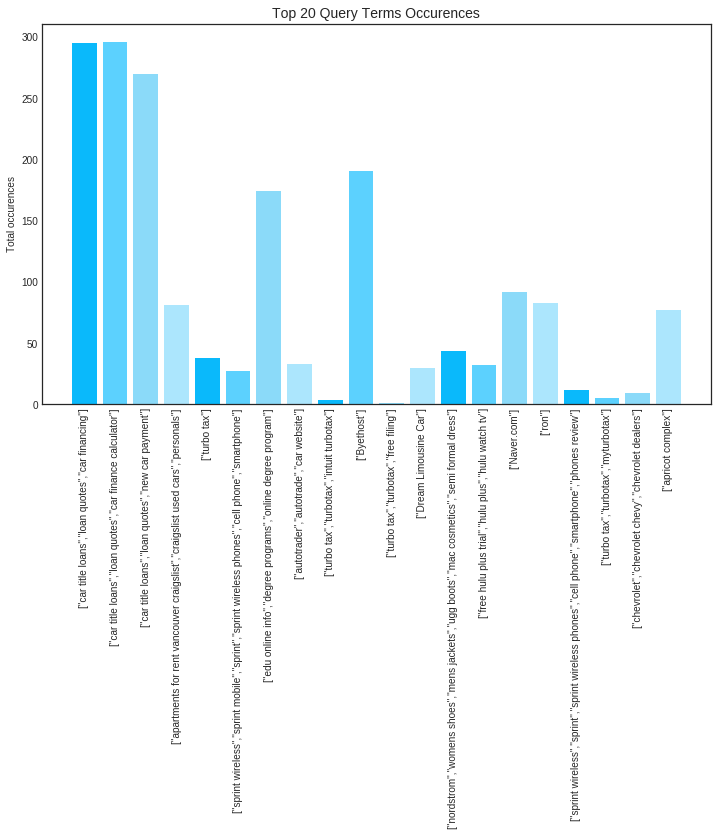

In [65]:
#Query terms table
fig,ax = plt.subplots(figsize=(12, 7))
bcolor = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD"]

plt.bar(x = qt_table.head(20).index, height = qt_table.head(20)['valid_clicks'],color=bcolor)

plt.ylabel('Total occurences')
plt.title('Top 20 Query Terms Occurences', fontsize=14);
plt.xticks(rotation = 'vertical')

total_num = float(len(qt_table))
for i in [1,5,10, 50, 100, 200]:
    print ('-- {:.2f}% of query terms had {} or more valid clicks'.format( (qt_table['valid_clicks'][qt_table['valid_clicks']>=i].count()) / total_num *100,i))


6.2). For IP addresses with > 1 click:


In [66]:
ip_list = df.IP_address.value_counts()[df.IP_address.value_counts() >1].to_frame().index


In [67]:
df_ip = df[df.IP_address.isin(ip_list)]

In [68]:
# Provide a breakdown on invalid and valid clicks. Include steps taken to conduct analysis
ip_status_table = df_ip.click_status.value_counts().to_frame()
ip_status_table['percentage'] = ip_status_table.click_status / ip_status_table.click_status.sum()
ip_status_table




,click_status,percentage
1,2453,0.81279
0,565,0.18721


In [69]:
# Provide a breakdown on whether these users send the same query term for each click
ip_query_table = pd.pivot_table(df_ip,index=['IP_address','query_term'],values='click_status',aggfunc=[len]).reset_index()
ip_query_table.head()

,IP_address,query_term,len
,,,click_status
0,0.38.12.224,"[""youtube"",""youtuby"",""r youtube""]",1
1,0.38.12.224,"[""youtube"",""youtuby"",""youtube org""]",2
2,0.53.181.217,"[""Nyanko Seek""]",3
3,0.71.103.209,"[""meet girls"",""dating girls""]",4
4,0.73.240.6,"[""Badidu""]",2


In [70]:
ip_query_table_2 = pd.pivot_table(ip_query_table,index=['IP_address'],values='query_term',aggfunc=[len]).reset_index()
ip_query_table_2.columns = ['IP_address','unique_query_terms']


/home/aurobindo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [71]:
ip_unique_query = ip_query_table_2.unique_query_terms.value_counts().to_frame()
ip_unique_query['percentage'] = ip_unique_query.unique_query_terms / ip_unique_query.unique_query_terms.sum()
ip_unique_query

,unique_query_terms,percentage
1,736,0.623201
2,379,0.320914
3,50,0.042337
4,13,0.011008
5,3,0.002540


In [72]:
# Identify any shared attributes for this pool of users (if any)
# Create ip_clicks_status: 1 = IP addresses with > 1 click, 0 = IP addresses with 1 click
df['ip_clicks_status'] = df.IP_address.map(lambda x: 1 if x in ip_list else 0)


In [73]:
df['ip_clicks_status'].sum() / float(len(df['ip_clicks_status']))


0.2987231515391468

In [74]:
df.to_csv('cleaned_data.csv')

In [75]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions,country,city,devices,date,hour,query_term_list,len_query_term_list,ip_clicks_status
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,0.28,0,Italy,Unknown,iPad,29/01/1,11,"[michael kors, michael michael kors]",2,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0,Unknown,Unknown,Windows,29/01/1,11,"[meet girls, dating girls]",2,1
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0,Unknown,Unknown,Windows,29/01/1,11,"[meet girls, dating girls]",2,1
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,0.90,0,Japan,Nagoya,Windows,29/01/1,11,"[credit report, credit karma, free online cred...",3,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,0.17,0,Australia,Sydney,compatible,29/01/1,11,[Byethost],1,1


## Extract date and month

In [76]:
df['day'] = df.date.map(lambda x: x[:2])
df['month'] = df.date.map(lambda x: x[3:5])

## Encoded the device features with label encoding

In [77]:
from sklearn import preprocessing

# create a instance
le = preprocessing.LabelEncoder()

# fit the data for label encoding
le.fit(list(df.devices.unique()))

# transform categorical variable to numerical variable 
le.transform(df.devices)

# make a separate column
df['transform_devices'] = le.transform(df.devices)

## Encoded the country features with label encoding

In [78]:
le.fit(list(df.country.unique()))

le.transform(df.country)

df['transform_country'] = le.transform(df.country)

## Encoded the city features with label encoding

In [79]:
le.fit(list(df.city.unique()))

le.transform(df.city)

df['transform_city'] = le.transform(df.city)

## Encoded the group of query features with label encoding

In [80]:
le.fit(list(df.query_term.unique()))

le.transform(df.query_term)

df['transform_query'] = le.transform(df.query_term)

In [81]:
# see the dataframe

df.head(1)

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions,country,city,devices,...,hour,query_term_list,len_query_term_list,ip_clicks_status,day,month,transform_devices,transform_country,transform_city,transform_query
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,0.28,0,Italy,Unknown,iPad,...,11,"[michael kors, michael michael kors]",2,0,29,01,11,44,1448,2012


# Apply Linear regression model

In [82]:
# Import libraries

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# Selecting the features and label

X_ = df[['click_status',"conversions","hour","len_query_term_list","ip_clicks_status",'transform_devices','day','month',"transform_country","transform_city","transform_query"]]
y_ = df[["cost_per_click"]]

In [84]:
# Create linear regression object

regr = linear_model.LinearRegression()

In [85]:
# Split the data into training/testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X_, y_, test_size=0.33, random_state=42)

In [86]:
# Train the model using the training sets

regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
# Make predictions using the testing set

y_pred = regr.predict(X_test)

In [88]:
# The coefficients 
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 3.23119550e-03  5.43068441e-01 -6.19966695e-03  3.10239461e-02
   1.02299290e-02 -1.78314094e-02  1.66533454e-16  0.00000000e+00
  -2.71308358e-04  2.34391738e-05  6.84455996e-06]]
Mean squared error: 0.22
Variance score: 0.46


# Apply Neural Network for regression

In [89]:
# Encoded dataset

X_train.head()

,click_status,conversions,hour,len_query_term_list,ip_clicks_status,transform_devices,day,month,transform_country,transform_city,transform_query
4442,1,0,13,3,0,9,29,01,91,1448,1361
2858,1,0,12,1,0,7,29,01,90,1448,2150
3518,1,0,12,1,0,7,29,01,80,410,1575
9934,1,0,15,1,0,7,29,01,90,1448,776
3142,1,0,12,3,0,7,29,01,90,217,1620


In [90]:
# Load libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [92]:
# define and fit the final model
model = Sequential()

# Add fully connected layer with a ReLU activation function
model.add(Dense(11, input_dim=11, activation='relu'))

# Add fully connected layer with a linear activation function
model.add(Dense(1, activation='linear'))

# Compile neural network with mean square error loss , adam optimzer and mse metrics
model.compile(loss='mse', optimizer='adam',metrics=['mse'])

# Train neural network with 500 epochs
history = model.fit(X_train, y_train,batch_size=100, epochs=500,validation_data=(X_test, y_test))


Train on 6769 samples, validate on 3334 samples
Epoch 1/500
6769/6769 [==============================] - 0s 60us/step - loss: 1952.6522 - mean_squared_error: 1952.6522 - val_loss: 290.5590 - val_mean_squared_error: 290.5590
Epoch 2/500
6769/6769 [==============================] - 0s 24us/step - loss: 114.2481 - mean_squared_error: 114.2481 - val_loss: 66.4734 - val_mean_squared_error: 66.4734
Epoch 3/500
6769/6769 [==============================] - 0s 25us/step - loss: 56.4573 - mean_squared_error: 56.4573 - val_loss: 47.5117 - val_mean_squared_error: 47.5117
Epoch 4/500
6769/6769 [==============================] - 0s 30us/step - loss: 39.9192 - mean_squared_error: 39.9192 - val_loss: 33.2705 - val_mean_squared_error: 33.2705
Epoch 5/500
6769/6769 [==============================] - 0s 25us/step - loss: 27.5729 - mean_squared_error: 27.5729 - val_loss: 22.7544 - val_mean_squared_error: 22.7544
Epoch 6/500
6769/6769 [==============================] - 0s 26us/step - loss: 18.7139 - mean_s

6769/6769 [==============================] - 0s 24us/step - loss: 0.4484 - mean_squared_error: 0.4484 - val_loss: 0.4812 - val_mean_squared_error: 0.4812
Epoch 50/500
6769/6769 [==============================] - 0s 26us/step - loss: 0.4134 - mean_squared_error: 0.4134 - val_loss: 0.4611 - val_mean_squared_error: 0.4611
Epoch 51/500
6769/6769 [==============================] - 0s 27us/step - loss: 0.4034 - mean_squared_error: 0.4034 - val_loss: 0.5038 - val_mean_squared_error: 0.5038
Epoch 52/500
6769/6769 [==============================] - 0s 22us/step - loss: 0.3946 - mean_squared_error: 0.3946 - val_loss: 0.4314 - val_mean_squared_error: 0.4314
Epoch 53/500
6769/6769 [==============================] - 0s 24us/step - loss: 0.3799 - mean_squared_error: 0.3799 - val_loss: 0.4365 - val_mean_squared_error: 0.4365
Epoch 54/500
6769/6769 [==============================] - 0s 25us/step - loss: 0.3792 - mean_squared_error: 0.3792 - val_loss: 0.4156 - val_mean_squared_error: 0.4156
Epoch 55/50

6769/6769 [==============================] - 0s 27us/step - loss: 0.2429 - mean_squared_error: 0.2429 - val_loss: 0.2345 - val_mean_squared_error: 0.2345
Epoch 99/500
6769/6769 [==============================] - 0s 31us/step - loss: 0.2664 - mean_squared_error: 0.2664 - val_loss: 0.3024 - val_mean_squared_error: 0.3024
Epoch 100/500
6769/6769 [==============================] - 0s 31us/step - loss: 0.2187 - mean_squared_error: 0.2187 - val_loss: 0.2328 - val_mean_squared_error: 0.2328
Epoch 101/500
6769/6769 [==============================] - 0s 31us/step - loss: 0.2163 - mean_squared_error: 0.2163 - val_loss: 0.2462 - val_mean_squared_error: 0.2462
Epoch 102/500
6769/6769 [==============================] - 0s 27us/step - loss: 0.2208 - mean_squared_error: 0.2208 - val_loss: 0.3581 - val_mean_squared_error: 0.3581
Epoch 103/500
6769/6769 [==============================] - 0s 30us/step - loss: 0.2495 - mean_squared_error: 0.2495 - val_loss: 0.3122 - val_mean_squared_error: 0.3122
Epoch 1

Epoch 147/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2337 - mean_squared_error: 0.2337 - val_loss: 0.2972 - val_mean_squared_error: 0.2972
Epoch 148/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2305 - mean_squared_error: 0.2305 - val_loss: 0.2847 - val_mean_squared_error: 0.2847
Epoch 149/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2323 - mean_squared_error: 0.2323 - val_loss: 0.3518 - val_mean_squared_error: 0.3518
Epoch 150/500
6769/6769 [==============================] - 0s 25us/step - loss: 0.2886 - mean_squared_error: 0.2886 - val_loss: 0.2330 - val_mean_squared_error: 0.2330
Epoch 151/500
6769/6769 [==============================] - 0s 21us/step - loss: 0.2085 - mean_squared_error: 0.2085 - val_loss: 0.2375 - val_mean_squared_error: 0.2375
Epoch 152/500
6769/6769 [==============================] - 0s 21us/step - loss: 0.2237 - mean_squared_error: 0.2237 - val_loss: 0.2467 - val_mean_squared_error:

Epoch 196/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2935 - mean_squared_error: 0.2935 - val_loss: 0.4531 - val_mean_squared_error: 0.4531
Epoch 197/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2424 - mean_squared_error: 0.2424 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 198/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2146 - mean_squared_error: 0.2146 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 199/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2228 - mean_squared_error: 0.2228 - val_loss: 0.2389 - val_mean_squared_error: 0.2389
Epoch 200/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2029 - mean_squared_error: 0.2029 - val_loss: 0.4201 - val_mean_squared_error: 0.4201
Epoch 201/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2613 - mean_squared_error: 0.2613 - val_loss: 0.3455 - val_mean_squared_error:

Epoch 245/500
6769/6769 [==============================] - 0s 21us/step - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 0.3503 - val_mean_squared_error: 0.3503
Epoch 246/500
6769/6769 [==============================] - 0s 21us/step - loss: 0.3223 - mean_squared_error: 0.3223 - val_loss: 0.2326 - val_mean_squared_error: 0.2326
Epoch 247/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2068 - mean_squared_error: 0.2068 - val_loss: 0.2360 - val_mean_squared_error: 0.2360
Epoch 248/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.2989 - val_mean_squared_error: 0.2989
Epoch 249/500
6769/6769 [==============================] - 0s 22us/step - loss: 0.2430 - mean_squared_error: 0.2430 - val_loss: 0.2389 - val_mean_squared_error: 0.2389
Epoch 250/500
6769/6769 [==============================] - 0s 21us/step - loss: 0.2060 - mean_squared_error: 0.2060 - val_loss: 0.3451 - val_mean_squared_error:

Epoch 294/500
6769/6769 [==============================] - 0s 26us/step - loss: 0.2676 - mean_squared_error: 0.2676 - val_loss: 0.2641 - val_mean_squared_error: 0.2641
Epoch 295/500
6769/6769 [==============================] - 0s 27us/step - loss: 0.2237 - mean_squared_error: 0.2237 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 296/500
6769/6769 [==============================] - 0s 28us/step - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.5122 - val_mean_squared_error: 0.5122
Epoch 297/500
6769/6769 [==============================] - 0s 32us/step - loss: 0.2709 - mean_squared_error: 0.2709 - val_loss: 0.3083 - val_mean_squared_error: 0.3083
Epoch 298/500
6769/6769 [==============================] - 0s 34us/step - loss: 0.2296 - mean_squared_error: 0.2296 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 299/500
6769/6769 [==============================] - 0s 30us/step - loss: 0.1998 - mean_squared_error: 0.1998 - val_loss: 0.2262 - val_mean_squared_error:

Epoch 343/500
6769/6769 [==============================] - 0s 26us/step - loss: 0.2280 - mean_squared_error: 0.2280 - val_loss: 0.2478 - val_mean_squared_error: 0.2478
Epoch 344/500
6769/6769 [==============================] - 0s 26us/step - loss: 0.2162 - mean_squared_error: 0.2162 - val_loss: 0.2858 - val_mean_squared_error: 0.2858
Epoch 345/500
6769/6769 [==============================] - 0s 28us/step - loss: 0.2206 - mean_squared_error: 0.2206 - val_loss: 0.2778 - val_mean_squared_error: 0.2778
Epoch 346/500
6769/6769 [==============================] - 0s 26us/step - loss: 0.2573 - mean_squared_error: 0.2573 - val_loss: 0.3395 - val_mean_squared_error: 0.3395
Epoch 347/500
6769/6769 [==============================] - 0s 25us/step - loss: 0.2525 - mean_squared_error: 0.2525 - val_loss: 0.3841 - val_mean_squared_error: 0.3841
Epoch 348/500
6769/6769 [==============================] - 0s 25us/step - loss: 0.2383 - mean_squared_error: 0.2383 - val_loss: 0.2550 - val_mean_squared_error:

Epoch 392/500
6769/6769 [==============================] - 0s 26us/step - loss: 0.2538 - mean_squared_error: 0.2538 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 393/500
6769/6769 [==============================] - 0s 20us/step - loss: 0.2478 - mean_squared_error: 0.2478 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 394/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2051 - mean_squared_error: 0.2051 - val_loss: 0.4735 - val_mean_squared_error: 0.4735
Epoch 395/500
6769/6769 [==============================] - 0s 21us/step - loss: 0.2324 - mean_squared_error: 0.2324 - val_loss: 0.3197 - val_mean_squared_error: 0.3197
Epoch 396/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2757 - mean_squared_error: 0.2757 - val_loss: 0.3641 - val_mean_squared_error: 0.3641
Epoch 397/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2306 - mean_squared_error: 0.2306 - val_loss: 0.2161 - val_mean_squared_error:

Epoch 441/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2215 - mean_squared_error: 0.2215 - val_loss: 0.2981 - val_mean_squared_error: 0.2981
Epoch 442/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.3242 - mean_squared_error: 0.3242 - val_loss: 0.3879 - val_mean_squared_error: 0.3879
Epoch 443/500
6769/6769 [==============================] - 0s 18us/step - loss: 0.2361 - mean_squared_error: 0.2361 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 444/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2103 - mean_squared_error: 0.2103 - val_loss: 0.4254 - val_mean_squared_error: 0.4254
Epoch 445/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2798 - mean_squared_error: 0.2798 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 446/500
6769/6769 [==============================] - 0s 19us/step - loss: 0.2294 - mean_squared_error: 0.2294 - val_loss: 0.3029 - val_mean_squared_error:

Epoch 490/500
6769/6769 [==============================] - 0s 33us/step - loss: 0.2579 - mean_squared_error: 0.2579 - val_loss: 0.3695 - val_mean_squared_error: 0.3695
Epoch 491/500
6769/6769 [==============================] - 0s 28us/step - loss: 0.2515 - mean_squared_error: 0.2515 - val_loss: 0.2753 - val_mean_squared_error: 0.2753
Epoch 492/500
6769/6769 [==============================] - 0s 28us/step - loss: 0.2352 - mean_squared_error: 0.2352 - val_loss: 0.2658 - val_mean_squared_error: 0.2658
Epoch 493/500
6769/6769 [==============================] - 0s 27us/step - loss: 0.2407 - mean_squared_error: 0.2407 - val_loss: 0.2590 - val_mean_squared_error: 0.2590
Epoch 494/500
6769/6769 [==============================] - 0s 24us/step - loss: 0.2275 - mean_squared_error: 0.2275 - val_loss: 0.2470 - val_mean_squared_error: 0.2470
Epoch 495/500
6769/6769 [==============================] - 0s 27us/step - loss: 0.2024 - mean_squared_error: 0.2024 - val_loss: 0.2278 - val_mean_squared_error:

In [93]:
# print the summery of model parameters

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 12        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
None


## Install packages

* pip install pydot
* Download this https://graphviz.gitlab.io/pub/graphviz/stable/SOURCES/graphviz.tar.gz
* Extract it and change to that directory
* And type following command
```
./autogen.sh
./configure
make
sudo make install
```

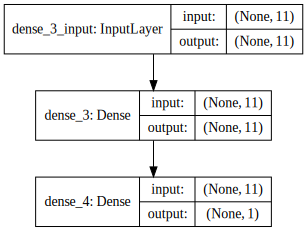

In [94]:
# Visualize model architecture

from keras.utils.vis_utils import plot_model
from IPython.display import SVG, display

plot_model(model, to_file='model_plot.svg', show_shapes=True, show_layer_names=True)
display(SVG('model_plot.svg'))

## Visualize Neural Network Loss History

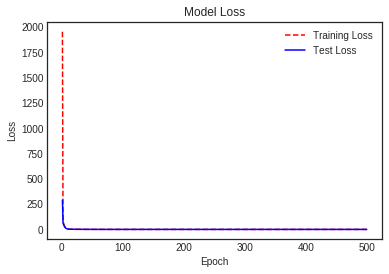

In [98]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [99]:
# make prediction with validation set
ynew = model.predict(X_test)

# show the inputs and predicted outputs
for i in range(len(X_test)):
	print("i=%s, Predicted=%s, Actual=%s" % (i, ynew[i],y_test.iloc[i]))

i=0, Predicted=[0.3609401], Actual=cost_per_click    0.17
Name: 1145, dtype: float64
i=1, Predicted=[0.8292171], Actual=cost_per_click    0.7
Name: 8826, dtype: float64
i=2, Predicted=[1.3284255], Actual=cost_per_click    1.24
Name: 9271, dtype: float64
i=3, Predicted=[0.33043778], Actual=cost_per_click    0.17
Name: 647, dtype: float64
i=4, Predicted=[0.15094577], Actual=cost_per_click    0.17
Name: 6203, dtype: float64
i=5, Predicted=[0.23523436], Actual=cost_per_click    0.17
Name: 2233, dtype: float64
i=6, Predicted=[1.32859], Actual=cost_per_click    1.24
Name: 8410, dtype: float64
i=7, Predicted=[0.22003661], Actual=cost_per_click    0.17
Name: 6946, dtype: float64
i=8, Predicted=[0.29370987], Actual=cost_per_click    0.17
Name: 259, dtype: float64
i=9, Predicted=[0.16329081], Actual=cost_per_click    0.17
Name: 5876, dtype: float64
i=10, Predicted=[0.19151603], Actual=cost_per_click    0.17
Name: 8453, dtype: float64
i=11, Predicted=[0.40503705], Actual=cost_per_click    0.17
Na

Name: 623, dtype: float64
i=334, Predicted=[0.24070464], Actual=cost_per_click    0.17
Name: 8840, dtype: float64
i=335, Predicted=[0.30667984], Actual=cost_per_click    0.17
Name: 7897, dtype: float64
i=336, Predicted=[0.2008258], Actual=cost_per_click    0.17
Name: 7283, dtype: float64
i=337, Predicted=[0.17924987], Actual=cost_per_click    0.17
Name: 3307, dtype: float64
i=338, Predicted=[0.24506484], Actual=cost_per_click    0.18
Name: 5898, dtype: float64
i=339, Predicted=[0.28823578], Actual=cost_per_click    0.17
Name: 9979, dtype: float64
i=340, Predicted=[0.18090077], Actual=cost_per_click    0.18
Name: 4584, dtype: float64
i=341, Predicted=[0.7757808], Actual=cost_per_click    0.22
Name: 4469, dtype: float64
i=342, Predicted=[0.18270217], Actual=cost_per_click    0.17
Name: 9590, dtype: float64
i=343, Predicted=[0.09053336], Actual=cost_per_click    0.17
Name: 6663, dtype: float64
i=344, Predicted=[0.3917815], Actual=cost_per_click    0.17
Name: 293, dtype: float64
i=345, Pre

Name: 4800, dtype: float64
i=692, Predicted=[0.2824031], Actual=cost_per_click    0.17
Name: 3746, dtype: float64
i=693, Predicted=[0.20459472], Actual=cost_per_click    0.17
Name: 4210, dtype: float64
i=694, Predicted=[0.21933089], Actual=cost_per_click    0.17
Name: 7800, dtype: float64
i=695, Predicted=[0.09908973], Actual=cost_per_click    0.17
Name: 1056, dtype: float64
i=696, Predicted=[0.1677867], Actual=cost_per_click    0.17
Name: 3025, dtype: float64
i=697, Predicted=[1.3228823], Actual=cost_per_click    1.24
Name: 6163, dtype: float64
i=698, Predicted=[0.25158072], Actual=cost_per_click    0.17
Name: 5998, dtype: float64
i=699, Predicted=[0.23744689], Actual=cost_per_click    0.17
Name: 4742, dtype: float64
i=700, Predicted=[0.21452199], Actual=cost_per_click    0.17
Name: 7439, dtype: float64
i=701, Predicted=[0.3998996], Actual=cost_per_click    0.17
Name: 5382, dtype: float64
i=702, Predicted=[0.8953258], Actual=cost_per_click    0.22
Name: 2611, dtype: float64
i=703, Pre

Name: 2423, dtype: float64
i=956, Predicted=[0.1282221], Actual=cost_per_click    0.17
Name: 7517, dtype: float64
i=957, Predicted=[2.720468], Actual=cost_per_click    2.85
Name: 7407, dtype: float64
i=958, Predicted=[0.4050547], Actual=cost_per_click    0.7
Name: 8803, dtype: float64
i=959, Predicted=[0.232442], Actual=cost_per_click    0.17
Name: 8909, dtype: float64
i=960, Predicted=[0.14885817], Actual=cost_per_click    0.17
Name: 23, dtype: float64
i=961, Predicted=[0.23908912], Actual=cost_per_click    0.17
Name: 1568, dtype: float64
i=962, Predicted=[1.3164564], Actual=cost_per_click    1.24
Name: 6906, dtype: float64
i=963, Predicted=[0.28313172], Actual=cost_per_click    0.37
Name: 291, dtype: float64
i=964, Predicted=[0.16360198], Actual=cost_per_click    0.17
Name: 4002, dtype: float64
i=965, Predicted=[0.23549758], Actual=cost_per_click    0.17
Name: 3071, dtype: float64
i=966, Predicted=[0.18914615], Actual=cost_per_click    0.17
Name: 4506, dtype: float64
i=967, Predicted

Name: 9518, dtype: float64
i=1382, Predicted=[0.18366729], Actual=cost_per_click    0.17
Name: 8613, dtype: float64
i=1383, Predicted=[0.30222428], Actual=cost_per_click    0.17
Name: 217, dtype: float64
i=1384, Predicted=[0.21122323], Actual=cost_per_click    0.18
Name: 2254, dtype: float64
i=1385, Predicted=[1.3557388], Actual=cost_per_click    1.24
Name: 8121, dtype: float64
i=1386, Predicted=[0.27956498], Actual=cost_per_click    0.17
Name: 8513, dtype: float64
i=1387, Predicted=[0.3373953], Actual=cost_per_click    0.17
Name: 1034, dtype: float64
i=1388, Predicted=[0.78890336], Actual=cost_per_click    0.22
Name: 3971, dtype: float64
i=1389, Predicted=[0.23626052], Actual=cost_per_click    0.17
Name: 9052, dtype: float64
i=1390, Predicted=[0.16576491], Actual=cost_per_click    0.17
Name: 8091, dtype: float64
i=1391, Predicted=[0.2029048], Actual=cost_per_click    0.17
Name: 9223, dtype: float64
i=1392, Predicted=[0.15470229], Actual=cost_per_click    0.19
Name: 1616, dtype: float6

i=1907, Predicted=[0.20578872], Actual=cost_per_click    0.17
Name: 2138, dtype: float64
i=1908, Predicted=[0.21883689], Actual=cost_per_click    0.18
Name: 3601, dtype: float64
i=1909, Predicted=[0.20127212], Actual=cost_per_click    0.17
Name: 9059, dtype: float64
i=1910, Predicted=[0.34797776], Actual=cost_per_click    0.2
Name: 914, dtype: float64
i=1911, Predicted=[0.23108016], Actual=cost_per_click    0.17
Name: 12, dtype: float64
i=1912, Predicted=[0.34285724], Actual=cost_per_click    0.22
Name: 3299, dtype: float64
i=1913, Predicted=[0.11669265], Actual=cost_per_click    0.19
Name: 6587, dtype: float64
i=1914, Predicted=[0.19692145], Actual=cost_per_click    0.17
Name: 1536, dtype: float64
i=1915, Predicted=[0.23425303], Actual=cost_per_click    0.17
Name: 736, dtype: float64
i=1916, Predicted=[0.17052566], Actual=cost_per_click    0.22
Name: 6310, dtype: float64
i=1917, Predicted=[0.21090232], Actual=cost_per_click    0.17
Name: 8747, dtype: float64
i=1918, Predicted=[0.24145

Name: 1721, dtype: float64
i=2420, Predicted=[0.254861], Actual=cost_per_click    0.18
Name: 5281, dtype: float64
i=2421, Predicted=[0.24286424], Actual=cost_per_click    0.17
Name: 3550, dtype: float64
i=2422, Predicted=[0.944576], Actual=cost_per_click    0.22
Name: 8269, dtype: float64
i=2423, Predicted=[0.18913136], Actual=cost_per_click    0.17
Name: 5909, dtype: float64
i=2424, Predicted=[0.94289505], Actual=cost_per_click    0.22
Name: 9043, dtype: float64
i=2425, Predicted=[0.36446393], Actual=cost_per_click    0.17
Name: 3204, dtype: float64
i=2426, Predicted=[0.29510194], Actual=cost_per_click    0.17
Name: 862, dtype: float64
i=2427, Predicted=[0.26520646], Actual=cost_per_click    0.17
Name: 2094, dtype: float64
i=2428, Predicted=[0.19471847], Actual=cost_per_click    0.17
Name: 947, dtype: float64
i=2429, Predicted=[0.20337783], Actual=cost_per_click    0.18
Name: 7538, dtype: float64
i=2430, Predicted=[0.29386246], Actual=cost_per_click    0.17
Name: 1444, dtype: float64


Name: 9764, dtype: float64
i=2918, Predicted=[0.22192107], Actual=cost_per_click    0.17
Name: 4782, dtype: float64
i=2919, Predicted=[0.79117113], Actual=cost_per_click    0.22
Name: 9886, dtype: float64
i=2920, Predicted=[0.20781909], Actual=cost_per_click    0.18
Name: 4617, dtype: float64
i=2921, Predicted=[0.30544007], Actual=cost_per_click    0.18
Name: 9821, dtype: float64
i=2922, Predicted=[0.2638713], Actual=cost_per_click    0.18
Name: 7073, dtype: float64
i=2923, Predicted=[0.1888362], Actual=cost_per_click    0.17
Name: 2729, dtype: float64
i=2924, Predicted=[0.23800765], Actual=cost_per_click    0.18
Name: 3960, dtype: float64
i=2925, Predicted=[0.17451604], Actual=cost_per_click    0.17
Name: 433, dtype: float64
i=2926, Predicted=[0.79564273], Actual=cost_per_click    0.22
Name: 3445, dtype: float64
i=2927, Predicted=[0.20153914], Actual=cost_per_click    0.17
Name: 7171, dtype: float64
i=2928, Predicted=[0.21550094], Actual=cost_per_click    0.17
Name: 9190, dtype: float

Name: 7372, dtype: float64
i=3086, Predicted=[0.19644652], Actual=cost_per_click    0.17
Name: 6615, dtype: float64
i=3087, Predicted=[0.24162312], Actual=cost_per_click    0.17
Name: 6853, dtype: float64
i=3088, Predicted=[0.1771556], Actual=cost_per_click    0.17
Name: 4630, dtype: float64
i=3089, Predicted=[0.2894336], Actual=cost_per_click    0.28
Name: 435, dtype: float64
i=3090, Predicted=[0.87447464], Actual=cost_per_click    0.22
Name: 8601, dtype: float64
i=3091, Predicted=[0.16816054], Actual=cost_per_click    0.35
Name: 9198, dtype: float64
i=3092, Predicted=[0.5866109], Actual=cost_per_click    0.37
Name: 308, dtype: float64
i=3093, Predicted=[0.20973311], Actual=cost_per_click    0.17
Name: 1565, dtype: float64
i=3094, Predicted=[0.21653853], Actual=cost_per_click    0.17
Name: 2631, dtype: float64
i=3095, Predicted=[0.16383468], Actual=cost_per_click    0.17
Name: 5736, dtype: float64
i=3096, Predicted=[0.22165786], Actual=cost_per_click    0.18
Name: 9920, dtype: float64

## Final Mean square error on training set and validation set

In [102]:
# Predict the cost per click

y_train_pred = model.predict(X_train)

print("Mean squared error on testing set : %.2f"
      % mean_squared_error(y_train, y_train_pred))


print("Mean squared error on validation set : %.2f"
      % mean_squared_error(y_test, ynew))

Mean squared error on testing set : 0.17
Mean squared error on validation set : 0.21
